In [1]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('list_working.csv',index_col=0)

In [3]:
df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,170.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,99.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,235.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,65.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,65.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'room_Private room', 'nbrhd_Bernal Heights',
       'nbrhd_Castro/Upper Market', 'nbrhd_Chinatown', 'nbrhd_Crocker Amazon',
       'nbrhd_Diamond Heights', 'nbrhd_Downtown/Civic Center',
       'nbrhd_Excelsior', 'nbrhd_Financial District', 'nbrhd_Glen Park',
       'nbrhd_Golden Gate Park', 'nbrhd_Haight Ashbury',
       'nbrhd_Inner Richmond', 'nbrhd_Inner Sunset', 'nbrhd_Lakeshore',
       'nbrhd_Marina', 'nbrhd_Mission', 'nbrhd_Nob Hill', 'nbrhd_Noe Valley',
       'nbrhd_North Beach', 'nbrhd_Ocean View', 'nbrhd_Outer Mission',
       'nbrhd_Outer Richmond', 'nbrhd_Outer Sunset', 'nbrhd_Pacific Heights',
       'nbrhd_Parkside', 'nbrhd_Potrero Hill', 'nbrhd_Presidio',
       'nbr

## Splitting into feature and target

In [5]:
df_tgt = df.price
df_feat2 = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms','extra_people',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'host_response_rate',
 'prop_House',
 'guests_included',
 'prop_Condominium']]
df_feat2.head()

,bedrooms,room_Private room,minimum_nights,latitude,number_of_reviews,bathrooms,extra_people,accommodates,review_scores_rating,prop_Guest suite,longitude,beds,number_of_reviews,host_response_rate,prop_House,guests_included,prop_Condominium
0,1.0,0,1,37.76931,217,1.0,25.0,3,97.0,0,-122.43386,2.0,217,100,0,2,0
1,1.0,1,1,37.75402,160,1.0,20.0,2,94.0,0,-122.45805,1.0,160,100,1,2,0
2,2.0,0,30,37.74511,111,1.0,0.0,5,98.0,0,-122.42102,3.0,111,80,0,2,0
3,1.0,1,32,37.76669,18,4.0,12.0,2,86.0,0,-122.45250,1.0,18,86,0,1,0
4,1.0,1,32,37.76487,8,4.0,12.0,2,93.0,0,-122.45183,1.0,8,86,0,1,0


In [6]:
df_tgt

0       170.0
1        99.0
2       235.0
3        65.0
4        65.0
        ...  
7108    299.0
7109    100.0
7110    250.0
7111    200.0
7113    187.0
Name: price, Length: 5859, dtype: float64

## Creating the Test and Train Set

In [7]:

X_train, X_test, y_train, y_test = train_test_split(df_feat2, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat2.columns.values, columns=['Features'])


Training set - Features:  (4687, 17) Target:  (4687,)
Training set - Features:  (1172, 17) Target:  (1172,)


In [8]:

p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
10,longitude,291.724556,0.150
14,prop_House,11.232647,0.054
13,host_response_rate,-0.363772,0.027
0,bedrooms,43.720368,0.000
9,prop_Guest suite,-23.101975,0.000
15,guests_included,2.976042,0.000
12,number_of_reviews,-0.094928,0.000
11,beds,5.641460,0.000
8,review_scores_rating,1.279883,0.000
1,room_Private room,-84.122068,0.000


In [9]:
r2_train = reg.score(X_train, y_train)
r2_train = round(r2_train, 3)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train


0.574

In [10]:


y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

93.889

In [11]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test


0.526

In [12]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse

94.28596060633767

Text(0, 0.5, 'Predictions')

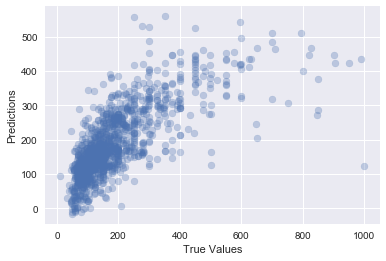

In [13]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:

summary_df = pd.DataFrame(columns=['Model', 'Description','Train (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','Test (RMSE)','R-squared (test)', 'Adjusted R-squared (test)'])
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)


In [15]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All Features' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df




,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889,0.576,0.574,94.285961,0.533,0.526


## Second Model- Dropping Superhost and Host Listings Count
Superhost and Host Listings Count had the highest P-Values which means we're the least confident they are not 0. Dropping it and running the model again

In [16]:
df_feat = df.drop(['host_is_superhost','host_total_listings_count','price',], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

reg = LinearRegression()
reg.fit(X_train,y_train)
df_feat_col = pd.DataFrame(data = df_feat.columns.values, columns=['Features'])


Training set - Features:  (4687, 52) Target:  (4687,)
Training set - Features:  (1172, 52) Target:  (1172,)


In [18]:
p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['P Values'], ascending=False)

,Features,Weights,P Values
18,nbrhd_Diamond Heights,1.751841e+01,0.904
29,nbrhd_Mission,2.809473e+01,0.656
26,nbrhd_Inner Sunset,2.208968e+01,0.623
35,nbrhd_Outer Richmond,-1.161682e+01,0.358
43,nbrhd_Seacliff,-2.680852e+01,0.344
21,nbrhd_Financial District,4.762311e+01,0.262
41,nbrhd_Presidio Heights,4.209052e+01,0.253
45,nbrhd_Twin Peaks,4.099312e+01,0.174
27,nbrhd_Lakeshore,5.687479e+01,0.171
14,nbrhd_Bernal Heights,1.532704e+01,0.163


In [19]:
r2_train = reg.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.587

In [20]:
y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

92.107

In [21]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test

0.531

In [22]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.353

Text(0, 0.5, 'Predictions')

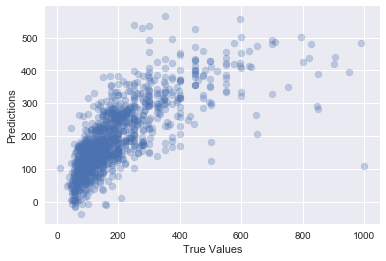

In [23]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [24]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Drop Super/Host Listings' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107,0.592,0.587,92.353000,0.552,0.531


## Next we're going to perform lasso, ridge and elastic net on our model
    
    

In [25]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_lasso = LassoCV(alphas=params, normalize= True,cv=10)

In [26]:
lr_lasso.fit(X_train, y_train)
predict = lr_lasso.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_lasso.predict(X_train)))
print(train_rmse)

92.2827129456168


In [27]:
r2_train = lr_lasso.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.586


In [28]:
r2_test = lr_lasso.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.53


In [29]:
y_test_pred = lr_lasso.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.514

Text(0, 0.5, 'Predictions')

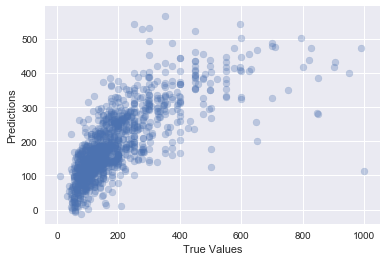

In [30]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [31]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'Lasso' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530


In [32]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_ridge = RidgeCV(alphas = params, normalize = True,cv=10)
lr_ridge.fit(X_train, y_train)
predict = lr_ridge.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train)))
print(train_rmse)

92.12096185250819


In [33]:
r2_train = lr_ridge.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.587


In [34]:
r2_test = lr_ridge.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.532


In [35]:
y_test_pred = lr_ridge.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.339

Text(0, 0.5, 'Predictions')

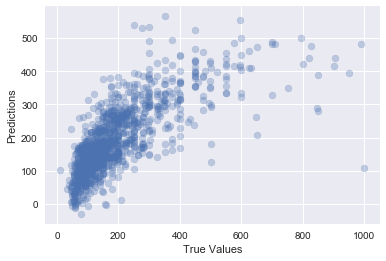

In [36]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [37]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'Ridge' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532


In [38]:
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
l1s = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
elastic = ElasticNetCV(alphas=params, l1_ratio = l1s,cv=10)

elastic.fit(X_train, y_train)
predict = elastic.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, elastic.predict(X_train)))
print(train_rmse)

92.1321187904336


In [39]:
r2_train = elastic.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
print(adjusted_r2_train)

0.587


In [40]:
r2_test = elastic.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(adjusted_r2_test)

0.532


In [41]:
y_test_pred = elastic.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

92.33

Text(0, 0.5, 'Predictions')

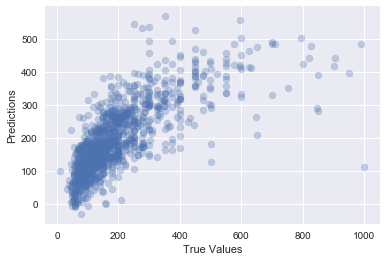

In [42]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [43]:

summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'Elastic Net' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df


,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532


## Creating a 2nd Order Polynomial Model


In [44]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lr_ridge = RidgeCV(params, normalize = True)
lr_ridge.fit(X_train_poly, y_train)
predict = lr_ridge.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train_poly)))
print(train_rmse)

84.93017579127721


In [45]:
#reg = LinearRegression()
#reg.fit(X_train_poly,y_train)

r2_train = lr_ridge.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.5

In [46]:
y_train_pred = lr_ridge.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

84.93

In [47]:
#reg.fit(X_test_poly, y_test)
r2_test = lr_ridge.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)
print(n)
print(p)

0.586
-2.64
1172
1431


In [48]:
y_test_pred = lr_ridge.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

88.785

In [49]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-6', 'Description' : 'Ridge Poly2' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532
5,Multiple Regression-6,Ridge Poly2,84.930000,0.653,0.500,88.785000,0.586,-2.640


## Third Model- Dropping Nieghborhoods
Selective choosing some features and testing poly2 elastic net, lasso, and ridge

In [50]:
df_feat3 = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'host_response_rate',
 'prop_House',
 'prop_Condominium']]
df_feat3.head()

,bedrooms,room_Private room,minimum_nights,latitude,number_of_reviews,bathrooms,accommodates,review_scores_rating,prop_Guest suite,longitude,beds,number_of_reviews,host_response_rate,prop_House,prop_Condominium
0,1.0,0,1,37.76931,217,1.0,3,97.0,0,-122.43386,2.0,217,100,0,0
1,1.0,1,1,37.75402,160,1.0,2,94.0,0,-122.45805,1.0,160,100,1,0
2,2.0,0,30,37.74511,111,1.0,5,98.0,0,-122.42102,3.0,111,80,0,0
3,1.0,1,32,37.76669,18,4.0,2,86.0,0,-122.45250,1.0,18,86,0,0
4,1.0,1,32,37.76487,8,4.0,2,93.0,0,-122.45183,1.0,8,86,0,0


In [51]:

X_train, X_test, y_train, y_test = train_test_split(df_feat3, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]


Training set - Features:  (4687, 15) Target:  (4687,)
Training set - Features:  (1172, 15) Target:  (1172,)


In [52]:
lr_ridge = RidgeCV(params, normalize = True)
lr_ridge.fit(X_train_poly, y_train)
predict = lr_ridge.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr_ridge.predict(X_train_poly)))
print(train_rmse)

85.62980711332956


In [53]:

r2_train = lr_ridge.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.637

In [54]:
y_train_pred = lr_ridge.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

85.63

In [55]:
r2_test = lr_ridge.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.586
0.663


In [56]:
y_test_pred = lr_ridge.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

88.787

In [57]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-7', 'Description' : 'Ridge Poly2 Small' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532
5,Multiple Regression-6,Ridge Poly2,84.930000,0.653,0.500,88.785000,0.586,-2.640
6,Multiple Regression-7,Ridge Poly2 Small,85.630000,0.647,0.637,88.787000,0.586,0.663


In [58]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

88.04870744086227


In [59]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.616

In [60]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

88.049

In [61]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.564
0.638


In [62]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

91.165

In [63]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-8', 'Description' : 'Lasso Poly2 Small' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532
5,Multiple Regression-6,Ridge Poly2,84.930000,0.653,0.500,88.785000,0.586,-2.640
6,Multiple Regression-7,Ridge Poly2 Small,85.630000,0.647,0.637,88.787000,0.586,0.663
7,Multiple Regression-8,Lasso Poly2 Small,88.049000,0.627,0.616,91.165000,0.564,0.638


## Model 4 No Lat or Long

In [64]:
df_feat4 = df[['bedrooms','room_Private room','minimum_nights','number_of_reviews','bathrooms',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'beds',
 'number_of_reviews',
 'host_response_rate',
 'prop_House',
 'prop_Condominium']]
df_feat4.head()

,bedrooms,room_Private room,minimum_nights,number_of_reviews,bathrooms,accommodates,review_scores_rating,prop_Guest suite,beds,number_of_reviews,host_response_rate,prop_House,prop_Condominium
0,1.0,0,1,217,1.0,3,97.0,0,2.0,217,100,0,0
1,1.0,1,1,160,1.0,2,94.0,0,1.0,160,100,1,0
2,2.0,0,30,111,1.0,5,98.0,0,3.0,111,80,0,0
3,1.0,1,32,18,4.0,2,86.0,0,1.0,18,86,0,0
4,1.0,1,32,8,4.0,2,93.0,0,1.0,8,86,0,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4687, 13) Target:  (4687,)
Training set - Features:  (1172, 13) Target:  (1172,)


In [66]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

91.18451577462827


In [67]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.591

In [68]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

91.185

In [69]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.535
0.588


In [70]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

94.126

In [71]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-10', 'Description' : 'Lasso Poly2 No Loc' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532
5,Multiple Regression-6,Ridge Poly2,84.930000,0.653,0.500,88.785000,0.586,-2.640
6,Multiple Regression-7,Ridge Poly2 Small,85.630000,0.647,0.637,88.787000,0.586,0.663
7,Multiple Regression-8,Lasso Poly2 Small,88.049000,0.627,0.616,91.165000,0.564,0.638
8,Multiple Regression-10,Lasso Poly2 No Loc,91.185000,0.600,0.591,94.126000,0.535,0.588


Removing latitude and longitude make things much worse

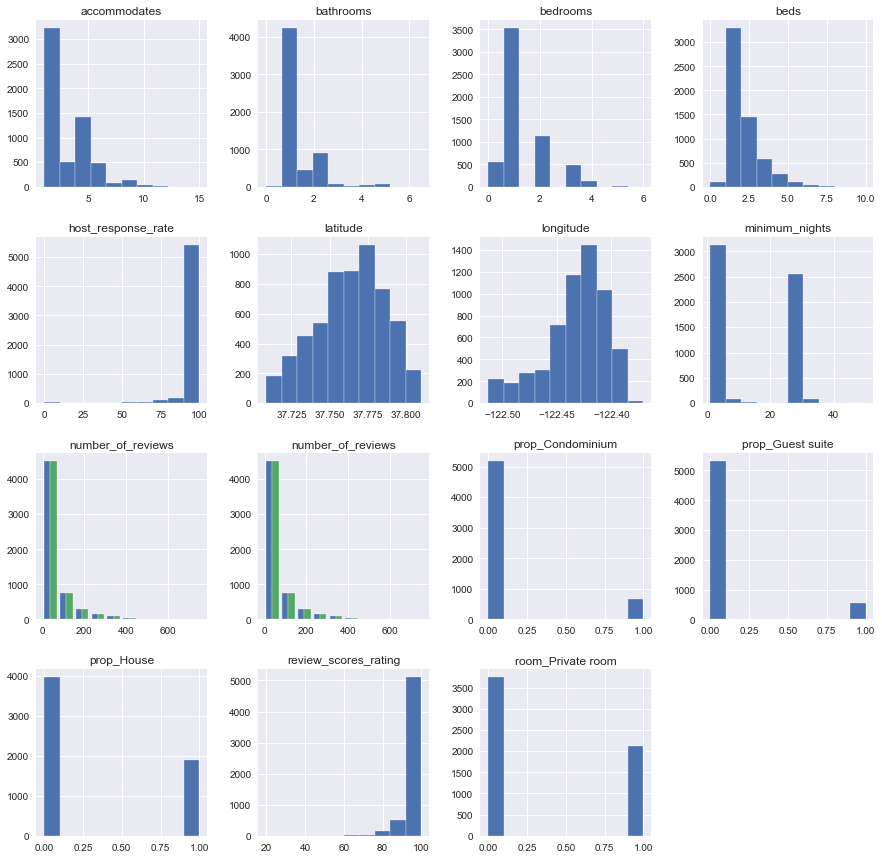

In [72]:
df_feat3.hist(figsize  = [15, 15]);

## Dropping host response rate as our ttest show it was not significant

In [73]:
df_feat4 = df[['bedrooms','room_Private room','minimum_nights','latitude','number_of_reviews','bathrooms',
 'accommodates',
 'review_scores_rating',
 'prop_Guest suite',
 'longitude',
 'beds',
 'number_of_reviews',
 'prop_House',
 'prop_Condominium']]
df_feat4.head()

,bedrooms,room_Private room,minimum_nights,latitude,number_of_reviews,bathrooms,accommodates,review_scores_rating,prop_Guest suite,longitude,beds,number_of_reviews,prop_House,prop_Condominium
0,1.0,0,1,37.76931,217,1.0,3,97.0,0,-122.43386,2.0,217,0,0
1,1.0,1,1,37.75402,160,1.0,2,94.0,0,-122.45805,1.0,160,1,0
2,2.0,0,30,37.74511,111,1.0,5,98.0,0,-122.42102,3.0,111,0,0
3,1.0,1,32,37.76669,18,4.0,2,86.0,0,-122.45250,1.0,18,0,0
4,1.0,1,32,37.76487,8,4.0,2,93.0,0,-122.45183,1.0,8,0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
params = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

Training set - Features:  (4687, 14) Target:  (4687,)
Training set - Features:  (1172, 14) Target:  (1172,)


In [75]:
params2 = [.001,.01,.1,1,2,10]
lr = LassoCV(alphas=params2, normalize = True,cv=10)
lr.fit(X_train_poly, y_train)
predict = lr.predict(X_test_poly)
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_poly)))
print(train_rmse)

88.27929278815506


In [76]:
r2_train = lr.score(X_train_poly, y_train)
n = X_train_poly.shape[0]
p = X_train_poly.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train

0.615

In [77]:
y_train_pred = lr.predict(X_train_poly)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

88.279

In [78]:
r2_test = lr.score(X_test_poly, y_test)
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

adjusted_r2_test = (1-(1-r2_test))*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
print(r2_test)
print(adjusted_r2_test)

0.562
0.626


In [79]:
y_test_pred = lr.predict(X_test_poly)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse = round(test_rmse, 3)
test_rmse

91.349

In [80]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-11', 'Description' : 'Lasso Poly2 No Response' , 'Train (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'Test (RMSE)' : test_rmse, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Train (RMSE),R-squared (training),Adjusted R-squared (training),Test (RMSE),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,93.889000,0.576,0.574,94.285961,0.533,0.526
1,Multiple Regression-2,Drop Super/Host Listings,92.107000,0.592,0.587,92.353000,0.552,0.531
2,Multiple Regression-3,Lasso,92.282713,0.590,0.586,92.514000,0.551,0.530
3,Multiple Regression-4,Ridge,92.120962,0.592,0.587,92.339000,0.552,0.532
4,Multiple Regression-5,Elastic Net,92.132119,0.592,0.587,92.330000,0.552,0.532
5,Multiple Regression-6,Ridge Poly2,84.930000,0.653,0.500,88.785000,0.586,-2.640
6,Multiple Regression-7,Ridge Poly2 Small,85.630000,0.647,0.637,88.787000,0.586,0.663
7,Multiple Regression-8,Lasso Poly2 Small,88.049000,0.627,0.616,91.165000,0.564,0.638
8,Multiple Regression-10,Lasso Poly2 No Loc,91.185000,0.600,0.591,94.126000,0.535,0.588
9,Multiple Regression-11,Lasso Poly2 No Response,88.279000,0.625,0.615,91.349000,0.562,0.626
